In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from maskrcnn.postprocess.resample import Resampler
from maskrcnn.postprocess.polygonize import load_anns

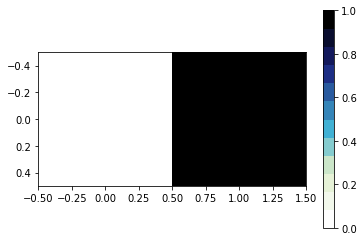

In [2]:
# color palette
cmap_list = [(0, '#FFFFFF'), (.25, '#DCEDC8'),
             (.45, '#42B3D5'), (.75, '#1A237E'), (1, '#000000')]
cmap = LinearSegmentedColormap.from_list(
    '', cmap_list, N=12)

plt.imshow([[0, 1]], cmap=cmap)
plt.colorbar()
plt.show()

In [3]:
# AOI index data w/ georeferencing info
AOI_IN_DIR = 'data/Experiment0/aoi.csv'
# download log data
LOG_IN_DIR = 'data/Experiment0/aoi_download_log.csv'
# output path
OUT_DIR = 'data/Experiment0/Output/'

# satellite derived data
SAT_IN_ANN_DIR = 'data/Mexico/Pred/infer/'
SAT_IN_IMG_DIR = 'data/Mexico/Image/'

# read image index data frame
df = pd.merge(pd.read_csv(AOI_IN_DIR),
              pd.read_csv(LOG_IN_DIR).loc[:, 'index'],
              how='right', on='index')

# link all inference data
r = Resampler.from_bounds(
    img_dir=SAT_IN_IMG_DIR,
    ann_dir=SAT_IN_ANN_DIR,
    indices=df['index'].values.tolist(),
    bounds=df[['lon_min', 'lat_min', 'lon_max', 'lat_max']].values.tolist())

In [ ]:
# sample locality
# sample = df.sample(n=1).loc[:, ['ent', 'mun', 'loc']]
# print(sample)
# df_viz = pd.merge(sample, df, how='left', on=['ent', 'mun', 'loc'])
# sample image
df_viz = df.sample(n=1)
idx, = df_viz['index'].tolist()
print(idx)

In [499]:
save = True

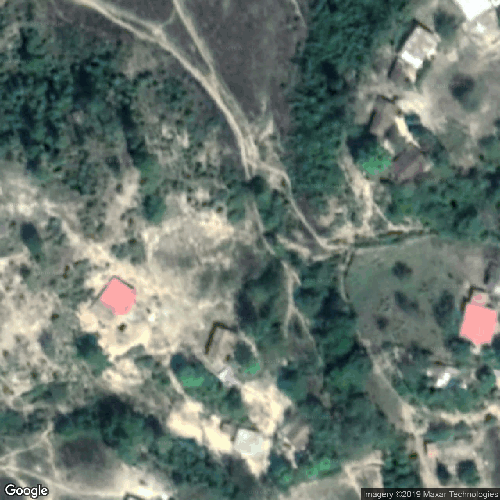

In [500]:
bounds = (df_viz['lon_min'].min(), df_viz['lat_min'].min(),
          df_viz['lon_max'].max(), df_viz['lat_max'].max())
r.plot(bounds=bounds, width=500, height=500, mode='img')
if save:
    r.output.save(os.path.join(OUT_DIR, 'schematic_{}_img.png'.format(idx)))
r.output

In [501]:
# read sat annotations
df_sat = load_anns(ann_files=[os.path.join(SAT_IN_ANN_DIR, idx + '.json')],
                   img_files=[os.path.join(SAT_IN_IMG_DIR, idx + '.png')],
                   idx_file=AOI_IN_DIR)

1it [00:00,  3.31it/s]


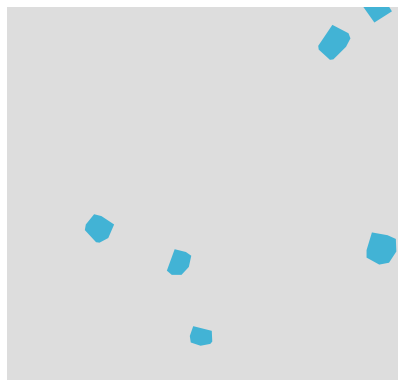

In [502]:
fig, ax = plt.subplots(figsize=(7, 7))
df_sat.plot(ax=ax, color=cmap_list[2][1])
ax.set_facecolor('#DDDDDD')
ax.set_xlim((bounds[0], bounds[2]))
ax.set_ylim((bounds[1], bounds[3]))
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
if save:
    fig.savefig(os.path.join(OUT_DIR, 'schematic_{}_ann.pdf'.format(idx)))
plt.show()

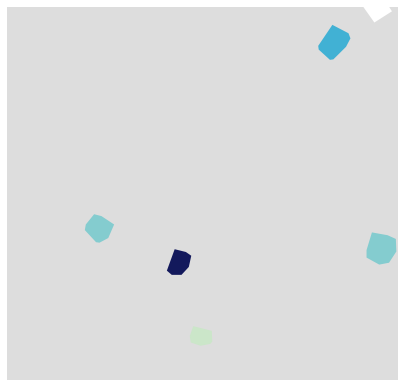

In [503]:
fig, ax = plt.subplots(figsize=(7, 7))
df_sat.plot(ax=ax, column='luminosity', cmap=cmap.reversed(), vmax=1, vmin=0.4)
ax.set_facecolor('#DDDDDD')
ax.set_xlim((bounds[0], bounds[2]))
ax.set_ylim((bounds[1], bounds[3]))
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
if save:
    fig.savefig(os.path.join(OUT_DIR, 'schematic_{}_bright.pdf'.format(idx)))
plt.show()

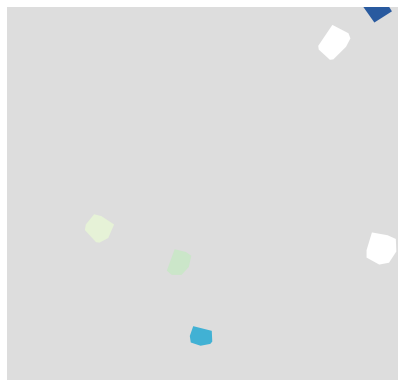

In [504]:
fig, ax = plt.subplots(figsize=(7, 7))
df_sat.plot(ax=ax, column='area', cmap=cmap.reversed(), vmax=3000, vmin=0)
ax.set_facecolor('#DDDDDD')
ax.set_xlim((bounds[0], bounds[2]))
ax.set_ylim((bounds[1], bounds[3]))
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
if save:
    fig.savefig(os.path.join(OUT_DIR, 'schematic_{}_area.pdf'.format(idx)))
plt.show()

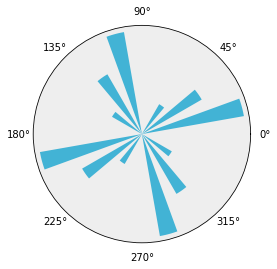

In [505]:
angles = df_sat['angle'].values / 180 * np.pi
angles = np.array([angles, angles + np.pi / 2,
                   angles + np.pi, angles + (3 / 2 * np.pi)]).flatten()
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist(angles,
        bins=np.linspace(0, 2 * np.pi, 37),
        color=cmap_list[2][1])
ax.set_facecolor('#EEEEEE')
ax.set_rticks([])
ax.grid(linewidth=0)
if save:
    fig.savefig(os.path.join(OUT_DIR, 'schematic_{}_angle.pdf'.format(idx)))
plt.show()